In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import math as m 

In [5]:
#closest values function
#This function takes the angles associated with each (x,y) coordinate and then, given a desired angle,
#it finds the indexes of the 2 closest neighbours (one above and one below). It always find the lower neighbour 
#angle first! The special case where two coordinates  have the same associated theta is delt with 
#and assumes that the orinigal series of coorindates are defined counter clockwise around the origin. 

#NOTE: To run this definition, you need to have made a list where each entry is the inververse tan of 
#the corresponding (x,y) point of the desired shape i.e input_list= [atan(y1/x1),..., atan(yn.xn)] given 
#shape described by n points. 

def neighbours_index(input_list,input_value):
    j=[]
    for i in range(0,len(input_list)):
        if input_value>=input_list[i]:
            j.append(input_list[i])
            theta1=max(j)
            ind=input_list.index(theta1)
            thetas_index.clear()
            thetas_index.append(ind)
            thetas_index.append((ind+1)%len(input_list))
            
        if len(thetas_index)==0:
            ind_new= input_list.index(max(input_list))
            thetas_index.clear()
            thetas_index.append(ind_new)
            thetas_index.append((ind_new+1)%len(input_list))
            
        #else:
            #thetas_index[0]=ind
            #thetas_index[1]=(ind+1)%len(input_list)
        
#special case= when two input thetass are the same 
        if input_list[thetas_index[0]]==input_list[thetas_index[1]]:
            thetas_index[0]=thetas_index[1]
            thetas_index[1]=(thetas_index[1]+1)%len(input_list)

    #print(thetas_index) #sanity check
    
   

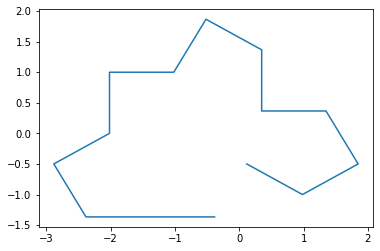

In [6]:
#load in Shape you desire approximation for 
#For code to work you need a series of x and y points

#change me
file_name="exact_coords_hat/"
name="r_1.0"

#Input path to where your initial shape coords are stored- This is just my personal file name
path="/Users/ali/Documents/USyd/Honours/Code/"+file_name+name+".txt"


data= pd.read_csv(path,sep='\s+', names=["x_coords","y_coords"])

#converting columns to lists- weird initial column if you dont!
x=data['x_coords'][0:14].tolist() #column selection 1 over to make closed shape, fix this later
y=data['y_coords'][0:14].tolist()

#plotting-sanity check
plt.plot(x,y)

#more sanity checks 
#print(len(x))


In [7]:
#Creating a list of theta values based on each (x,y) point of our defined shape
theta=[]
for i in range(0,len(x)):
    if x[i]==0 and y[i]>0:
        theta.append((m.pi)/2)

    elif x[i]==0 and y[i]<0:
        theta.append((3*(m.pi))/2)
        
    else:
        theta.append(m.atan(y[i]/x[i]))
    
    if x[i]<0:
        theta[i]+=m.pi 
    else:
        if y[i]<0:
            theta[i]+=2*m.pi
            
#print(theta) #sanity check

56


(-3.080359756953571,
 2.0793222829641556,
 -1.5270149678419245,
 2.014755441422759)

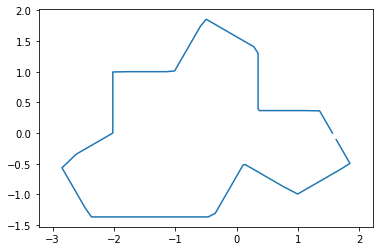

In [9]:
#Variables and lists
n= 96 #number of spokes
theta_spoke=(2*m.pi)/n #angle between each spoke
thetas_index=[]
lower_index=[]
upper_index=[]
x_1=[]
y_1=[]
x_2=[]
y_2=[]
x_approx=[]
y_approx=[]

#running loop over multiple angles to get approximate for shape 

for i in range(0,n):
    thetas_index.clear()
    neighbours_index(theta,i*theta_spoke)
    lower_index.append(thetas_index[0])
    upper_index.append(thetas_index[1])
    x_1.append(x[lower_index[i]])
    y_1.append(y[lower_index[i]])
    x_2.append(x[upper_index[i]])
    y_2.append(y[upper_index[i]])

#Creating approx points
for i in range(0,n):
    #grad=(y_2[i]-y_1[i])/(x_2[i]-x_1[i])# testing for infinte gradient
    if abs(x_2[i]-x_1[i])<0.0000001:
        x_3=x_1[i]
    else:
        x_3= (y_1[i]-((y_2[i]-y_1[i])/(x_2[i]-x_1[i]))*x_1[i])/(m.tan(theta_spoke*i)-((y_2[i]-y_1[i])/(x_2[i]-x_1[i])))
    
    x_approx.append(x_3)
    y_approx.append(m.tan(theta_spoke*i)*x_approx[i])



print(y_approx.index(min(y_approx)))

plt.plot(x_approx,y_approx,"-") 
plt.axis("equal")


In [10]:
#saving file as a data file 
#path= "/Users/ali/Documents/USyd/Honours/Code/spoke_coords/"+name+"_"+str(n)+".dat"

#data = np.array([x_approx, y_approx])
#data = data.T

#np.savetxt(path, data)

Spoke Approx for Spectrum
---


0.2532785618838638
0.25328
0.2712804580217725
0.27128
0.2905618476239115
0.29056
0.3112136713063396
0.31121
0.3333333333333329
0.33333
0.3570251610243044
0.35703
0.3824008968132919
0.3824
0.4095802252818123
0.40958
0.4386913376508303
0.43869
0.4698715363942662
0.46987
0.5032678828257012
0.50327
0.5390378907126209
0.53904
0.5773502691896253
0.57735
0.6183857184745551
0.61839
0.6623377821405255
0.66234
0.7094137599636062
0.70941
0.7598356856515922
0.75984
0.8138413740653184
0.81384
0.8716855428717355
0.87169
0.9336410139190199
0.93364
1.0
1.0
1.0710754830729146
1.07108
1.1472026904398773
1.1472
1.228740675845439
1.22874
1.316074012952493
1.31607
1.4096146091828008
1.40961
1.509803648477106
1.5098
1.6171136721378652
1.61711
1.7320508075688787
1.73205
1.8551571554236685
1.85516


/var/folders/t6/hdn6719s5yddz06j8xrt_2xc0000gn/T/ipykernel_41182/2515782627.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


1.9870133464215798
1.98701
2.128241279890822
2.12824
2.27950705695478
2.27951
2.441524122195959
2.44152
2.6150566286152106
2.61506
2.800923041757064
2.80092


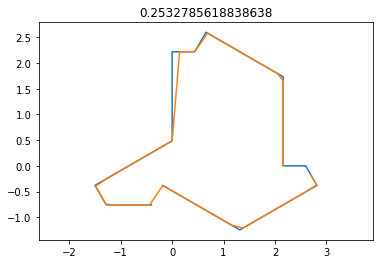

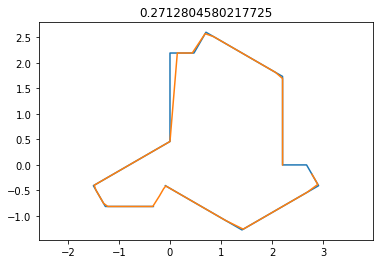

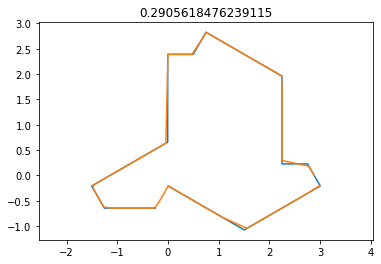

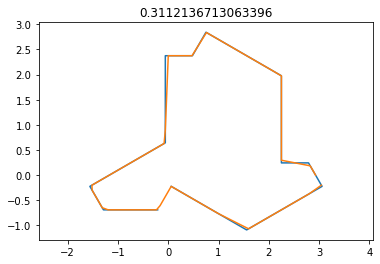

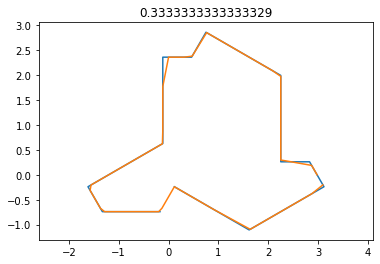

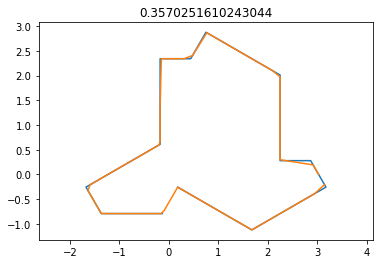

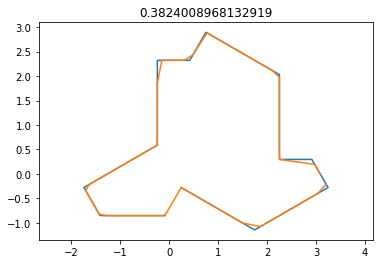

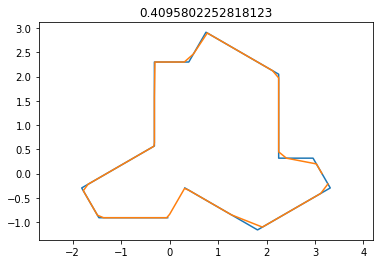

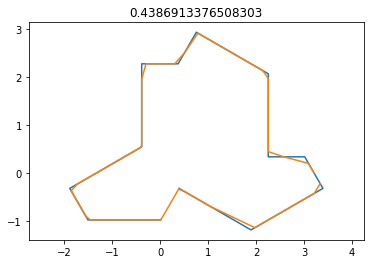

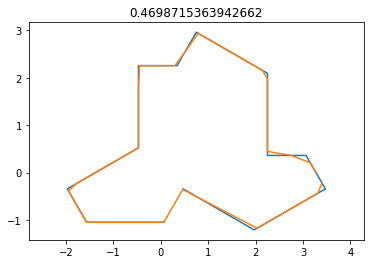

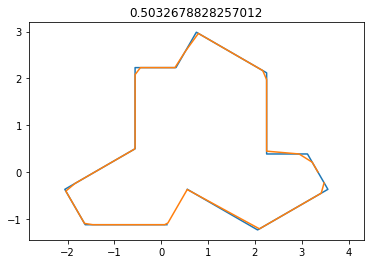

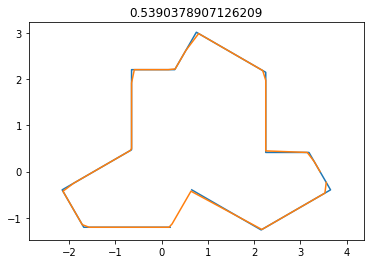

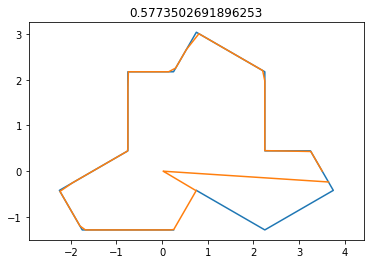

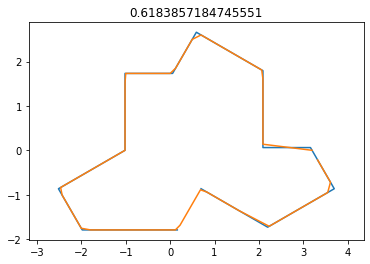

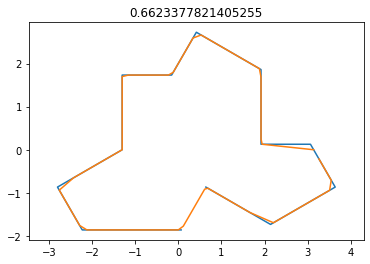

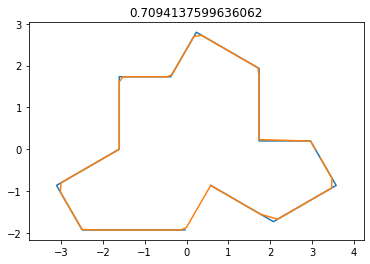

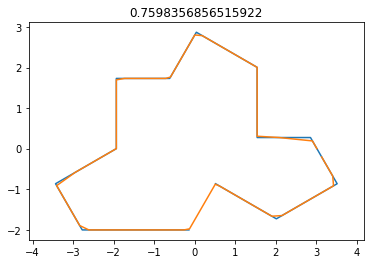

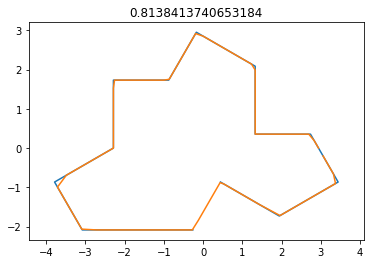

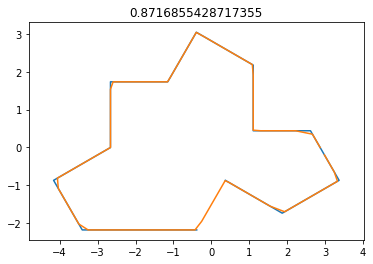

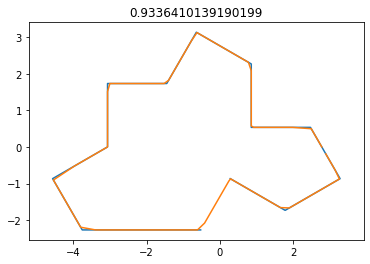

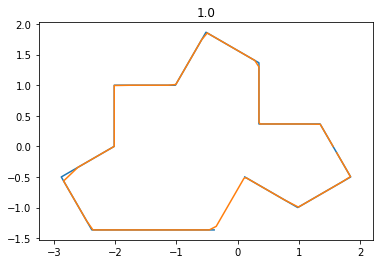

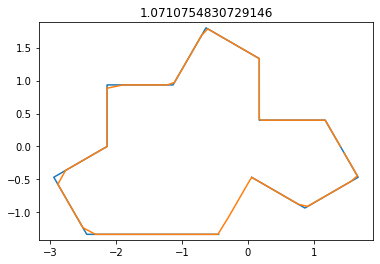

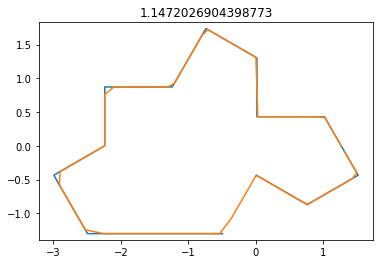

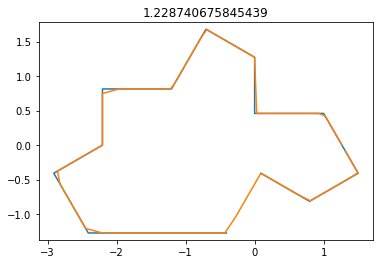

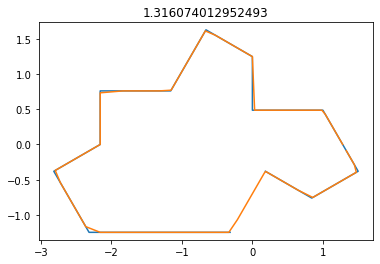

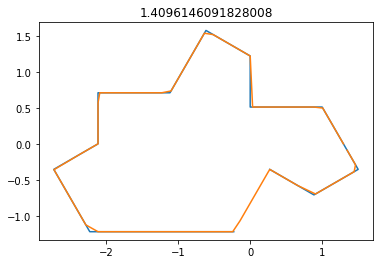

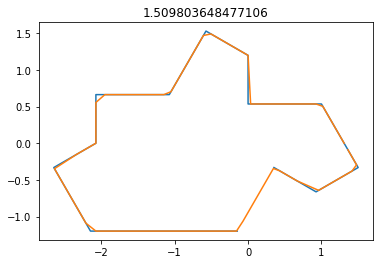

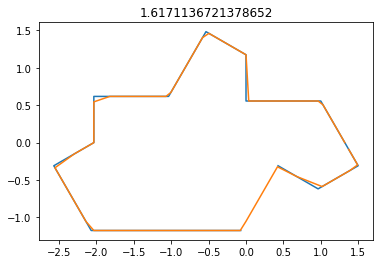

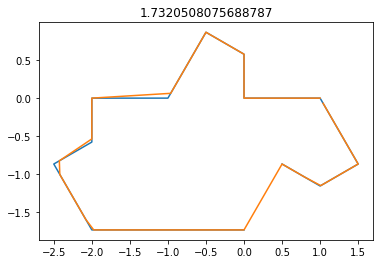

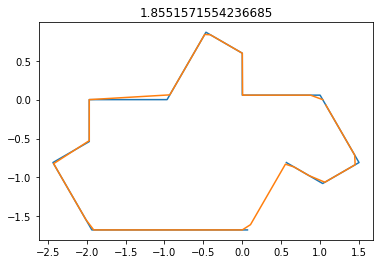

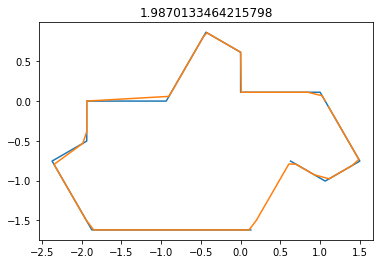

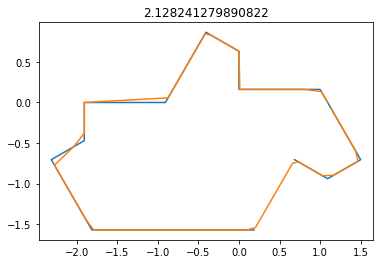

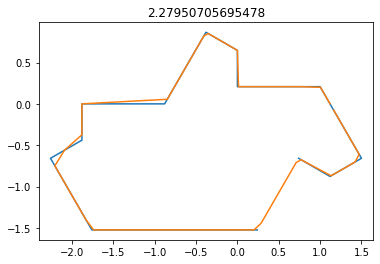

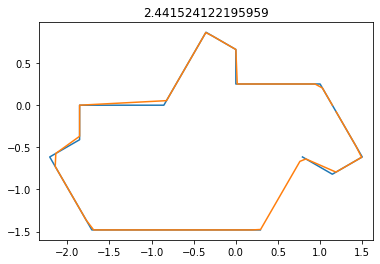

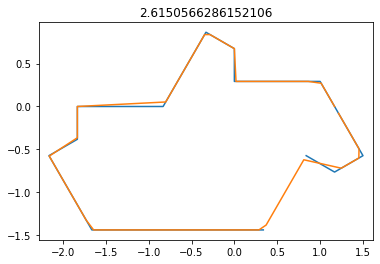

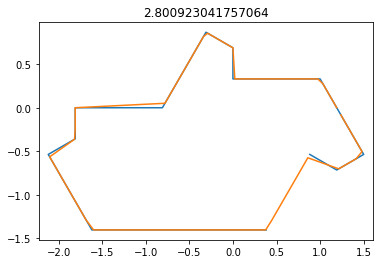

In [11]:
ns= 96 #number of spokes

#importing ratio spectrum for naming purposes
r_ss=pd.read_csv("/Users/ali/Documents/USyd/Honours/Code/ratio_spectrum.txt",sep='\s+',header=None,float_precision='round_trip')[0].tolist()

for n in range(0,len(r_ss)):
    r_full=r_ss[n]
    print(r_full) #sanity Check 
    r=round(r_full,5)
    print(r) #santity check 
    
    name="r_"+str(r)
    
    
    """
    #importing each of the exact coords
    if r==0.5773502691896258:
        special_name="_Hat"
        name="Tile("+str(r)+")"+special_name
    elif r==1:
        special_name="_Spectre"
        name="Tile("+str(r)+")"
    
    elif r==1.732050807568877:
        special_name="_Turtle"
        name="Tile("+str(r)+")"
    else:
        name="Tile("+str(r)+")"
    """

    path="/Users/ali/Documents/USyd/Honours/Code/exact_coords_hat/"+name+".txt"
    
    data= pd.read_csv(path,sep='\s+', names=["x_coords","y_coords"])
    
    #converting columns to lists- weird initial column if you dont!
    x=data['x_coords'][0:14].tolist() #column selection 1 over to make closed shape, fix this later
    y=data['y_coords'][0:14].tolist()

    #plotting-sanity check
    plt.figure()
    plt.plot(x,y)
    
    #Creating a list of theta values based on each (x,y) point of our defined shape
    theta=[]
    for i in range(0,len(x)):
        if x[i]==0 and y[i]>0:
            theta.append((m.pi)/2)

        elif x[i]==0 and y[i]<0:
            theta.append((3*(m.pi))/2)

        else:
            theta.append(m.atan(y[i]/x[i]))

        if x[i]<0:
            theta[i]+=m.pi 
        else:
            if y[i]<0:
                theta[i]+=2*m.pi
    
    #Variables and lists
    theta_spoke=(2*m.pi)/ns #angle between each spoke
    thetas_index=[]
    lower_index=[]
    upper_index=[]
    x_1=[]
    y_1=[]
    x_2=[]
    y_2=[]
    x_approx=[]
    y_approx=[]

    #running loop over multiple angles to get approximate for shape 

    for i in range(0,ns):
        thetas_index.clear()
        neighbours_index(theta,i*theta_spoke)
        lower_index.append(thetas_index[0])
        upper_index.append(thetas_index[1])
        x_1.append(x[lower_index[i]])
        y_1.append(y[lower_index[i]])
        x_2.append(x[upper_index[i]])
        y_2.append(y[upper_index[i]])

    #Creating approx points
    for i in range(0,ns):
        #grad=(y_2[i]-y_1[i])/(x_2[i]-x_1[i])# testing for infinte gradient
        if abs(x_2[i]-x_1[i])<0.0000000001:
            x_3=x_1[i]
        else:
            x_3= (y_1[i]-((y_2[i]-y_1[i])/(x_2[i]-x_1[i]))*x_1[i])/(m.tan(theta_spoke*i)-((y_2[i]-y_1[i])/(x_2[i]-x_1[i])))

        x_approx.append(x_3)
        y_approx.append(m.tan(theta_spoke*i)*x_approx[i])



    #print(y_approx.index(min(y_approx)))

    plt.plot(x_approx,y_approx,"-") 
    plt.axis("equal")
    plt.title(str(r_ss[n]))
    
    #saving file as a data file 
    path= "/Users/ali/Documents/USyd/Honours/Code/spoke_coords_hat/"+name+"_"+str(ns)+".dat"

    data = np.array([x_approx, y_approx])
    data = data.T

    np.savetxt(path, data, fmt='%s')

    


Spoke Approximation for Stegasaurus 
----

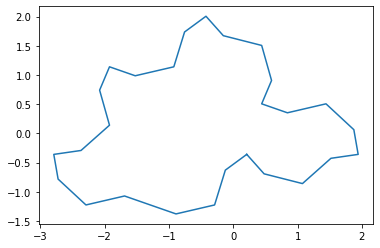

In [26]:
#load in Shape you desire approximation for 
#For code to work you need a series of x and y points

#change me
file_name="exact_coords_spectre/"
name="stegasaurus"

#Input path to where your initial shape coords are stored
path="/Users/ali/Documents/USyd/Honours/Code/"+file_name+name+".txt"


data= pd.read_csv(path,sep='\s+', names=["x_coords","y_coords"])

#converting columns to lists- weird initial column if you dont!
x=data['x_coords'][0:29].tolist() #column selection 1 over to make closed shape, fix this later
y=data['y_coords'][0:29].tolist()

#plotting-sanity check
plt.plot(x,y)

#more sanity checks 
#print(len(x))


In [27]:
#Creating a list of theta values based on each (x,y) point of our defined shape
theta=[]
for i in range(0,len(x)):
    if x[i]==0 and y[i]>0:
        theta.append((m.pi)/2)

    elif x[i]==0 and y[i]<0:
        theta.append((3*(m.pi))/2)
        
    else:
        theta.append(m.atan(y[i]/x[i]))
    
    if x[i]<0:
        theta[i]+=m.pi 
    else:
        if y[i]<0:
            theta[i]+=2*m.pi
            
#print(theta) #sanity check

285


(-3.026602540378444,
 2.1786533479473205,
 -1.5488508388777569,
 2.1753052248635907)

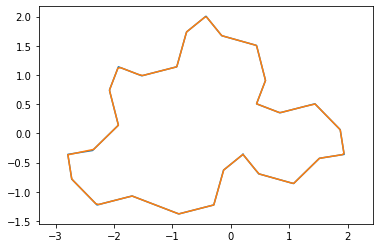

In [36]:
#Variables and lists
n= 144*3 #number of spokes
theta_spoke=(2*m.pi)/n #angle between each spoke
thetas_index=[]
lower_index=[]
upper_index=[]
x_1=[]
y_1=[]
x_2=[]
y_2=[]
x_approx=[]
y_approx=[]

#running loop over multiple angles to get approximate for shape 

for i in range(0,n):
    thetas_index.clear()
    neighbours_index(theta,i*theta_spoke)
    lower_index.append(thetas_index[0])
    upper_index.append(thetas_index[1])
    x_1.append(x[lower_index[i]])
    y_1.append(y[lower_index[i]])
    x_2.append(x[upper_index[i]])
    y_2.append(y[upper_index[i]])

#Creating approx points
for i in range(0,n):
    #grad=(y_2[i]-y_1[i])/(x_2[i]-x_1[i])# testing for infinte gradient
    if abs(x_2[i]-x_1[i])<0.0000001:
        x_3=x_1[i]
    else:
        x_3= (y_1[i]-((y_2[i]-y_1[i])/(x_2[i]-x_1[i]))*x_1[i])/(m.tan(theta_spoke*i)-((y_2[i]-y_1[i])/(x_2[i]-x_1[i])))
    
    x_approx.append(x_3)
    y_approx.append(m.tan(theta_spoke*i)*x_approx[i])



print(y_approx.index(min(y_approx)))
plt.plot(x,y)
plt.plot(x_approx,y_approx,"-") 
plt.axis("equal")


In [37]:
#saving file as a data file 
path= "/Users/ali/Documents/USyd/Honours/Code/spoke_coords_spectre/"+name+".dat"

data = np.array([x_approx, y_approx])
data = data.T

np.savetxt(path, data)

In [38]:
144*3

432

In [ ]:
4